<a href="https://colab.research.google.com/github/henriprado/Missao-pratica-5/blob/main/Miss%C3%A3o_Pr%C3%A1tica_N5_Dev_Full_Stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

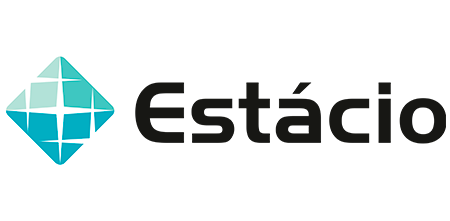

Nome do Campus: Polo kobrasol - São José - SC \
Nome do curso: Desenvolvimento Full Stack \
Nome da Disciplina: Colocando tudo em ordem e guardando \
Número da turma: 9001\
Semestre letivo:22.3\
Nome do integrante: Henrique Prado Kerecki

# Instala o pacote **faker** para simular dados

In [1]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.3 MB/s 


# Instala o pacote **num2words** para gerar o extenso de um número

In [2]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.6 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=e5b5c45860bcf87795bc03ab825f29fa32d074134039af3c61e9a63ef2ce6655
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


# Instala o pacote **wordcloud** para gerar a nuvem de palavras

In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Gera uma lista `dados[]` com nomes e notas

# Grava no arquivo **dados.txt**

In [4]:
from faker import Faker

fake = Faker('pt_BR')
dados = []
for n in range(1,100):
  dados.append(fake.name() + ',' + str(fake.random_int(0,10)))

arquivo = open('dados.txt', 'w+')
for dado in dados:
  arquivo.write(str(dado) + '\n')

arquivo.close()

##Abre o arquivo **dados.txt**

##Popula as listas `notas[]` e `nomes[]` com os dados vindos do arquivo

In [5]:
notas = []
nomes = []
for linha in open('dados.txt'):
  ln = linha.rstrip()
  nomes.append(ln.split(',')[0])
  notas.append(int(ln.split(',')[1]))

##Gera um gráfico de *histograma* com a probabilidade de ocorrência de cada nota


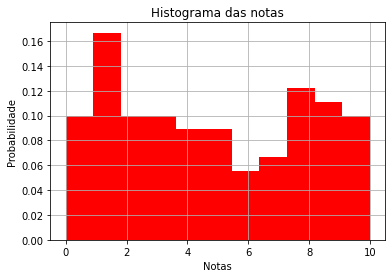

In [6]:
import matplotlib.pyplot as plt

num_bins=11
plt.hist(notas,num_bins,density=True,facecolor='red')

plt.xlabel('Notas')
plt.ylabel('Probabilidade')
plt.title('Histograma das notas')
plt.grid(True)
plt.show()

##Transforma a lista `notas[]` em uma lista de strings `notas_extenso[]` com o texto de cada uma destas notas

## Utiliza a função `join()` para juntar os textos de cada nota em uma única string `palavras`, separadas por vírgula

## Gera uma nuvem de palavras usando a string `palavras` como dado de entrada


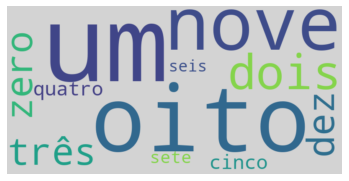

In [7]:
from wordcloud import WordCloud
from num2words import num2words

notas_extenso = []

for nota in notas:
  notas_extenso.append(num2words(nota,lang='pt-br'))

palavras = ','.join(notas_extenso)

nuvem_palavras = WordCloud(background_color='lightgrey',
                           width=800,height=400).generate(palavras)

plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
nuvem_palavras.to_file("Nuvem de notas.png")